# Práctico 1 - Procesamiento Digital de Imágenes

In [230]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

In [231]:
def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

## Definiendo Matrices para canales 0,1,2

In [232]:
Canal0 = np.array([[1, 0, 0], 
              [0, 0, 0], 
              [0, 0, 0]])
Canal1 = np.array([[0, 0, 0], 
              [0, 1, 0], 
              [0, 0, 0]])
Canal2 = np.array([[0, 0, 0], 
              [0, 0, 0], 
              [0, 0, 1]])

## 1. Intercambiar los canales: R->G, G->B, B->R

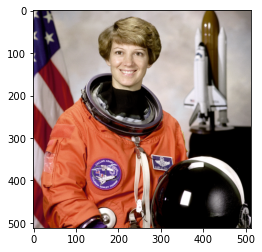

In [233]:
#Cargar Imagen de astronauta
Imagen_RGB = imageio.imread('imageio:astronaut.png')/255
plt.imshow(Imagen_RGB)

In [234]:
#Obtener Canal Rojo
Imagen_RGB0 = apply_matrix(Imagen_RGB, Canal0)

In [237]:
#Obtener Canal Verde
Imagen_RGB1= apply_matrix(Imagen_RGB, Canal1)

In [238]:
#Obtener Canal Azul
Imagen_RGB2= apply_matrix(Imagen_RGB, Canal2)

Text(0.5, 1.0, 'Imagen RGB Canal 2')

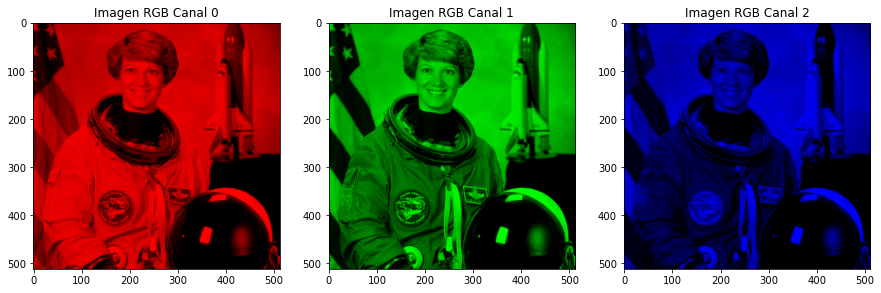

In [239]:
#Graficando
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(Imagen_RGB0)
axes[0].set_title('Imagen RGB Canal 0')
axes[1].imshow(Imagen_RGB1)
axes[1].set_title('Imagen RGB Canal 1')
axes[2].imshow(Imagen_RGB2)
axes[2].set_title('Imagen RGB Canal 2')

In [240]:
#Cambiar Canales
Filas,Columnas,Canales=Imagen_RGB.shape # obtenemos el tamaño de la imagen original
Imagen_BGR=np.zeros((Filas,Columnas,Canales)) # creamos una matriz de unos donde generar la imagen

In [241]:
Imagen_Aux=Imagen_RGB.copy()
Imagen_BGR[:, :,0]=Imagen_Aux[:, :,2]
Imagen_BGR[:, :,1]=Imagen_Aux[:, :,1]
Imagen_BGR[:, :,2]=Imagen_Aux[:, :,0]

Text(0.5, 1.0, 'Imagen BGR Canal 2')

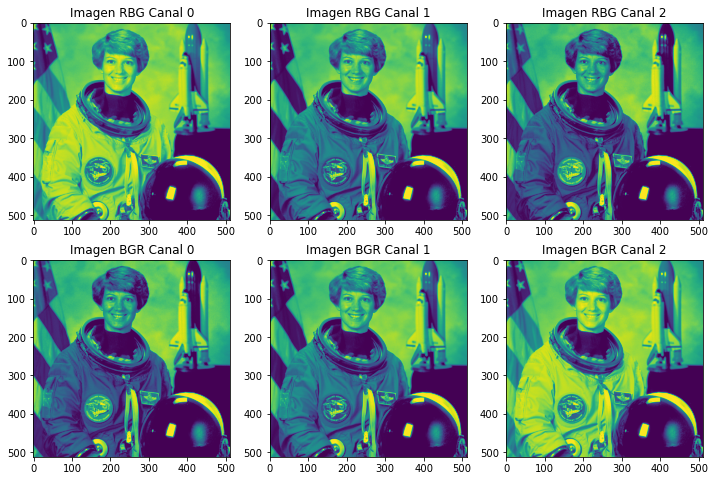

In [242]:
fig, axes = plt.subplots(2,3, figsize=(12,8))
axes[0,0].imshow(Imagen_RGB[:,:,0])
axes[0,0].set_title('Imagen RBG Canal 0')
axes[0,1].imshow(Imagen_RGB[:,:,1])
axes[0,1].set_title('Imagen RBG Canal 1')
axes[0,2].imshow(Imagen_RGB[:,:,2])
axes[0,2].set_title('Imagen RBG Canal 2')
axes[1,0].imshow(Imagen_BGR[:,:,0])
axes[1,0].set_title('Imagen BGR Canal 0')
axes[1,1].imshow(Imagen_BGR[:,:,1])
axes[1,1].set_title('Imagen BGR Canal 1')
axes[1,2].imshow(Imagen_BGR[:,:,2])
axes[1,2].set_title('Imagen BGR Canal 2')

## 2. Operaciones en el espacio YIQ

1. Convertir la imagen de RGB a YIQ
2. Multiplicar el canal Y por $\alpha>0$ y los canales IQ por $\beta>=0$
3. Convertir la imagen de YIQ a RGB
4. Truncar los valores RGB al rango \[0,1\] (utilizar np.clip)
5. Mostrar la imagen original y la imagen procesada

In [243]:
#Definiendo Matriz de RGB a YIQ 
MatrizRGBtoYIQ=np.array([[0.299,0.587,0.114],
                         [0.595716,-0.274453,-0.321263],
                         [0.211456,-0.522591,0.31135]])

In [244]:
MatrizYIQ=apply_matrix(Imagen_RGB, MatrizRGBtoYIQ)

## 2. Multiplicar el canal Y por $\alpha>0$ y los canales IQ constantes

In [245]:
YIQa1=MatrizYIQ.copy()
YIQa2=MatrizYIQ.copy()
YIQa3=MatrizYIQ.copy()
YIQa4=MatrizYIQ.copy()
#Aplicando un valor de alfa1= 1.2
YIQa1[:,:,0]=1.3*YIQa1[:,:,0]
#Aplicando un valor de alfa2= 1.6
YIQa2[:,:,0]=1.6*YIQa2[:,:,0]
#Aplicando un valor de alfa1= 0.6
YIQa3[:,:,0]=0.6*YIQa1[:,:,0]
#Aplicando un valor de alfa2= 0.2
YIQa4[:,:,0]=0.2*YIQa2[:,:,0]

In [246]:
#Definiendo Matriz de YIQ a RGB  
MatrizYIQtoRGB=np.array([[1,0.9663,0.6210],
                         [1,-0.2721,-0.6474],
                         [1,-1.1070,1.7046]])

In [247]:
ImagenRGB1=apply_matrix(YIQa1, MatrizYIQtoRGB)
ImagenRGB1=np.clip(ImagenRGB1, 0, 1) ## Clampea imagen en 0 a 1
ImagenRGB2=apply_matrix(YIQa2, MatrizYIQtoRGB)
ImagenRGB2=np.clip(ImagenRGB2, 0, 1) ## Clampea imagen en 0 a 1
ImagenRGB3=apply_matrix(YIQa3, MatrizYIQtoRGB)
ImagenRGB3=np.clip(ImagenRGB3, 0, 1) ## Clampea imagen en 0 a 1
ImagenRGB4=apply_matrix(YIQa4, MatrizYIQtoRGB)
ImagenRGB4=np.clip(ImagenRGB4, 0, 1) ## Clampea imagen en 0 a 1



## Graficando  $\alpha=1.3$ y $\alpha=1.6$ con $\beta>=Ctte.$

Text(0.5, 1.0, 'Imagen alfa=1.6')

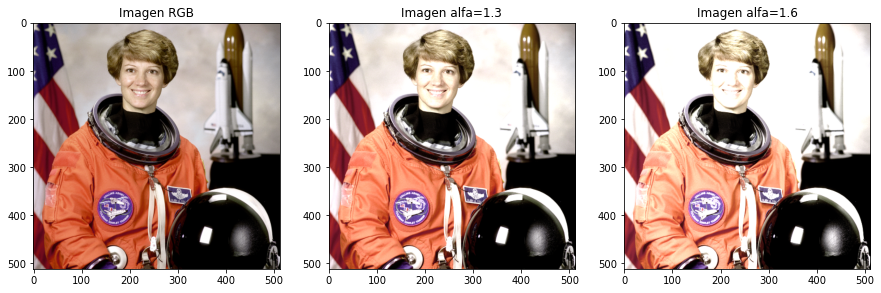

In [248]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))
axes[0].imshow(np.clip(Imagen_RGB, 0, 1))
axes[0].set_title('Imagen RGB')
axes[1].imshow(ImagenRGB1)
axes[1].set_title('Imagen alfa=1.3')
axes[2].imshow(ImagenRGB2)
axes[2].set_title('Imagen alfa=1.6')

## Graficando  $\alpha=0.6$ y $\alpha=0.2$ con $\beta>=Ctte.$

Text(0.5, 1.0, 'Imagen alfa=0.2')

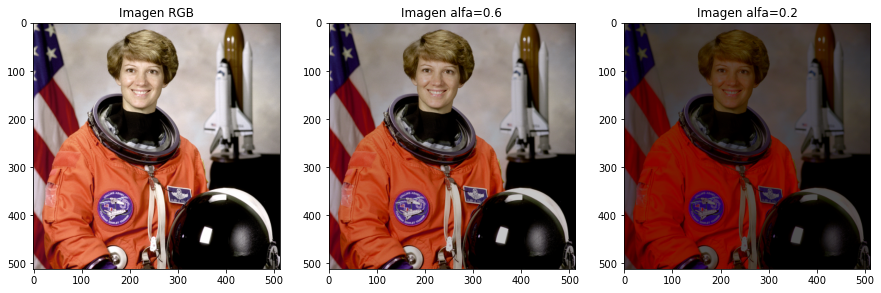

In [249]:
#Graficando
fig, axes = plt.subplots(1, 3, figsize=(15,7))
axes[0].imshow(np.clip(Imagen_RGB, 0, 1))
axes[0].set_title('Imagen RGB')
axes[1].imshow(ImagenRGB3)
axes[1].set_title('Imagen alfa=0.6')
axes[2].imshow(ImagenRGB4)
axes[2].set_title('Imagen alfa=0.2')

## 2. Multiplicar el canal  IQ por $\beta>=0$ y Y constante

In [250]:
YIQb1=MatrizYIQ.copy()
YIQb2=MatrizYIQ.copy()
YIQb3=MatrizYIQ.copy()
YIQb4=MatrizYIQ.copy()
#Aplicando un valor de beta1= 1.2
YIQb1[:,:,1]=1.2*YIQb1[:,:,1]  # Afectando canal I
YIQb1[:,:,2]=1.2*YIQb1[:,:,2]  # Afectando canal Q
#Aplicando un valor de beta2= 1.6
YIQb2[:,:,1]=1.6*YIQb2[:,:,1]
YIQb2[:,:,2]=1.6*YIQb2[:,:,2]
#Aplicando un valor de beta1= 0.6
YIQb3[:,:,1]=0.6*YIQb1[:,:,1]
YIQb3[:,:,2]=0.6*YIQb1[:,:,2]
#Aplicando un valor de beta4= 0.2
YIQb4[:,:,1]=0.2*YIQb2[:,:,1]
YIQb4[:,:,2]=0.2*YIQb2[:,:,2]

In [251]:
ImagenRGB5=apply_matrix(YIQb1, MatrizYIQtoRGB)
ImagenRGB5=np.clip(ImagenRGB5, 0, 1) ## Clampea imagen en 0 a 1
ImagenRGB6=apply_matrix(YIQb2, MatrizYIQtoRGB)
ImagenRGB6=np.clip(ImagenRGB6, 0, 1) ## Clampea imagen en 0 a 1
ImagenRGB7=apply_matrix(YIQb3, MatrizYIQtoRGB)
ImagenRGB7=np.clip(ImagenRGB7, 0, 1) ## Clampea imagen en 0 a 1
ImagenRGB8=apply_matrix(YIQb4, MatrizYIQtoRGB)
ImagenRGB8=np.clip(ImagenRGB8, 0, 1) ## Clampea imagen en 0 a 1

## Graficando con $\beta=1.2 $ y $\beta=1.6 $

Text(0.5, 1.0, 'Imagen beta=1.6')

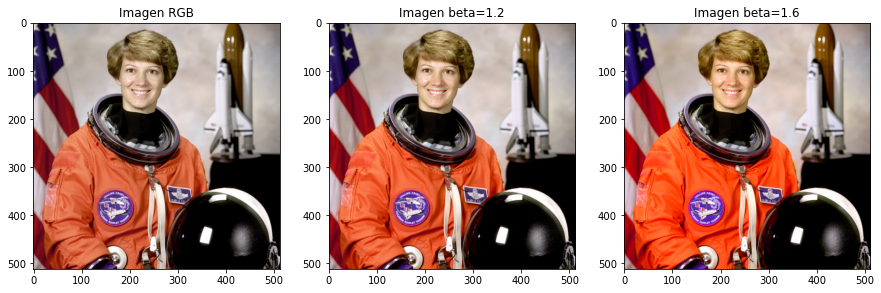

In [252]:
fig, axes = plt.subplots(1, 3, figsize=(15,7))
axes[0].imshow(np.clip(Imagen_RGB, 0, 1))
axes[0].set_title('Imagen RGB')
axes[1].imshow(ImagenRGB5)
axes[1].set_title('Imagen beta=1.2')
axes[2].imshow(ImagenRGB6)
axes[2].set_title('Imagen beta=1.6')

## Graficando con $\beta=0.6 $ y $\beta=0.2 $

Text(0.5, 1.0, 'Imagen beta=0.2')

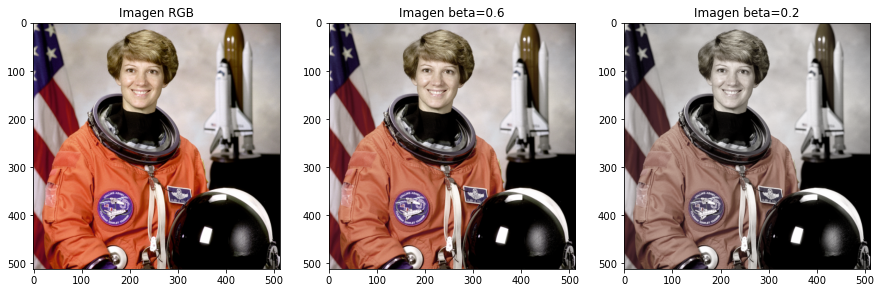

In [253]:
#Graficando
fig, axes = plt.subplots(1, 3, figsize=(15,7))
axes[0].imshow(np.clip(Imagen_RGB, 0, 1))
axes[0].set_title('Imagen RGB')
axes[1].imshow(ImagenRGB7)
axes[1].set_title('Imagen beta=0.6')
axes[2].imshow(ImagenRGB8)
axes[2].set_title('Imagen beta=0.2')

## 2. Multiplicar  por $\alpha = \beta >=0 $   

In [254]:
YIQab1=MatrizYIQ.copy()
YIQab2=MatrizYIQ.copy()
YIQab3=MatrizYIQ.copy()
YIQab4=MatrizYIQ.copy()
#Aplicando un valor de alpha=beta1= 1.2
YIQab1[:,:,:]=1.2*YIQb1[:,:,:]  # Afectando canal Y,I,Q
#Aplicando un valor de beta2= 1.8
YIQab2[:,:,:]=1.8*YIQb2[:,:,:]  # Afectando canal Y,I,Q
#Aplicando un valor de alpha=beta1= 0.6
YIQab3[:,:,:]=0.6*YIQb1[:,:,:]  # Afectando canal Y,I,Q
#Aplicando un valor de beta2= 0.2
YIQab4[:,:,:]=0.2*YIQb2[:,:,:]  # Afectando canal Y,I,Q

In [255]:
ImagenRGB9=apply_matrix(YIQab1, MatrizYIQtoRGB)
ImagenRGB9=np.clip(ImagenRGB9, 0, 1) ## Clampea imagen en 0 a 1
ImagenRGB10=apply_matrix(YIQab2, MatrizYIQtoRGB)
ImagenRGB10=np.clip(ImagenRGB10, 0, 1) ## Clampea imagen en 0 a 1
ImagenRGB11=apply_matrix(YIQab3, MatrizYIQtoRGB)
ImagenRGB11=np.clip(ImagenRGB11, 0, 1) ## Clampea imagen en 0 a 1
ImagenRGB12=apply_matrix(YIQab4, MatrizYIQtoRGB)
ImagenRGB12=np.clip(ImagenRGB12, 0, 1) ## Clampea imagen en 0 a 1

Text(0.5, 1.0, 'Imagen alfa=beta=1.8')

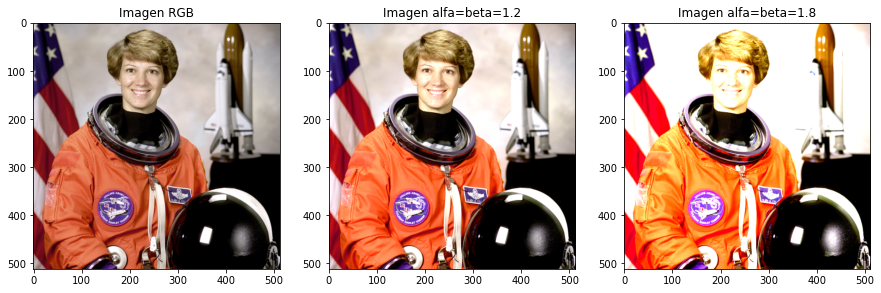

In [256]:
#Graficando alfa=beta
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(np.clip(Imagen_RGB, 0, 1))
axes[0].set_title('Imagen RGB')
axes[1].imshow(ImagenRGB9)
axes[1].set_title('Imagen alfa=beta=1.2')
axes[2].imshow(ImagenRGB10)
axes[2].set_title('Imagen alfa=beta=1.8')

Text(0.5, 1.0, 'Imagen alfa=beta=0.2')

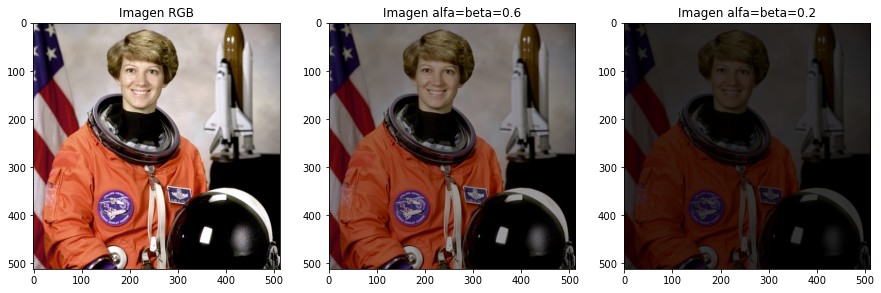

In [257]:
#Graficando alfa=beta
fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(np.clip(Imagen_RGB, 0, 1))
axes[0].set_title('Imagen RGB')
axes[1].imshow(ImagenRGB11)
axes[1].set_title('Imagen alfa=beta=0.6')
axes[2].imshow(ImagenRGB12)
axes[2].set_title('Imagen alfa=beta=0.2')

## \[Extra\] Graficar el conjunto de Mandelbrot con distintas paletas

Aquí se utiliza la librería Seaborn para graficar, la cual utiliza Matplotlib de fondo y permite realizar gráficos más personalizados. Utiliza los mismos mapas de colores que matplotlib, los cuales se pueden elegir con la variable cmap.

Descargar el archivo "mandelbrot.npy" desde el link de abajo y guardarlo en la misma carpeta que este Notebook.

[Click aquí para descargar mandelbrot.npy](https://drive.google.com/file/d/1aBhCCUK-nqCPLqr5HPQDZGXb1uhjr1gz/view?usp=sharing)

[Link a documentación de Matplotlib](https://matplotlib.org/3.5.1/tutorials/colors/colormaps.html)

##  Codigo  de la figura

In [258]:
import seaborn as sns
resolution = 240
iterations = 500
xlim = (-2.2, 0.8)
ylim = (-1.5, 1.5)

mask = np.ones((resolution,resolution), dtype=bool)
iter_mask = np.zeros((resolution,resolution))
z = np.zeros((resolution,resolution), np.complex128)
c = np.zeros((resolution,resolution), np.complex128)
c.real, c.imag = np.meshgrid(np.linspace(xlim[0], xlim[1], resolution), np.linspace(ylim[0], ylim[1], resolution))
for i in range(iterations):
    if (i+1) % int(iterations/10) == 0:
        print(str(int(round(100*i/iterations))) + '%')
    rows, cols = np.where(mask)
    for j in range(len(rows)):
        row, col = rows[j], cols[j]
        z[row,col] = z[row,col]**2 + c[row,col]
        if np.abs(z[row,col]) > 2:
            mask[row,col] = False
        else:
            iter_mask[row,col] += 1

iter_mask[mask] = 0
x = iter_mask/iter_mask.max()

10%
20%
30%
40%
50%
60%
70%
80%
90%
100%


In [259]:
k = 15
img = 1 - np.exp(-k*x) + x*np.exp(-k)

<AxesSubplot:>

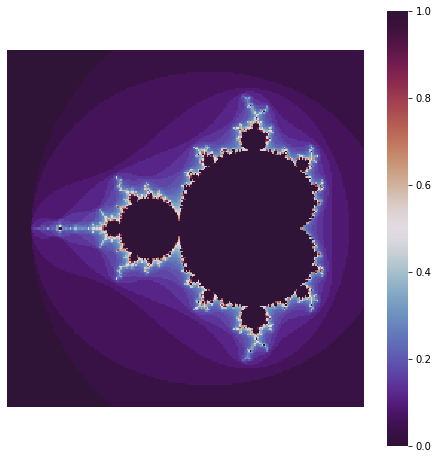

In [260]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(img, cmap='twilight_shifted', square=True, xticklabels=False, yticklabels=False)

<AxesSubplot:>

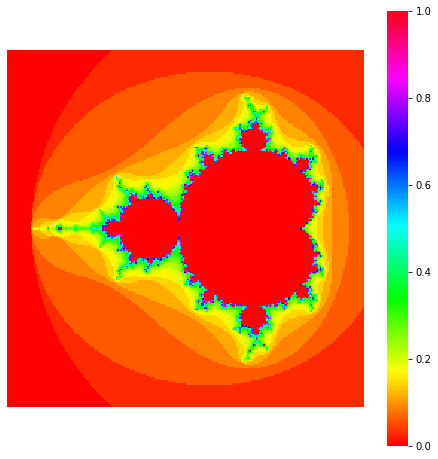

In [261]:
fig = plt.figure(figsize=(8,8))
sns.heatmap(img, cmap='hsv', square=True, xticklabels=False, yticklabels=False)